In [ ]:
# Load in Kaggle File
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"matthewguymason","key":"0d2877a50644b565e57b998ae654ae97"}'}

In [ ]:
# install it
!pip install -q kaggle

In [ ]:
# Set up the directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [ ]:
# Download the dog images data set
!kaggle datasets download -d jessicali9530/stanford-dogs-dataset

 99% 745M/750M [00:05<00:00, 118MB/s]
100% 750M/750M [00:05<00:00, 146MB/s]


In [ ]:
# Unzip the dog images
!unzip -q stanford-dogs-dataset.zip -d .

In [ ]:
# Imports
import numpy as np
import pandas as pd
from fastai.vision import *
from fastai.metrics import error_rate, accuracy

In [ ]:
size = 256
bs = 64
np.random.seed(42)

In [ ]:
path_anno = "annotations/Annotation"
path_img = "images/Images"

In [ ]:
# Display all the files downloaded
import os
labels = os.listdir(path_img)
print("No. of labels: {}".format(len(labels)))
print("-------------")

for label in labels:
  print("{}, {} files".format(label, len(os.listdir(path_img+'/'+label))))

No. of labels: 120
-------------
n02113624-toy_poodle, 151 files
n02088094-Afghan_hound, 239 files
n02088632-bluetick, 171 files
n02105412-kelpie, 153 files
n02108551-Tibetan_mastiff, 152 files
n02105855-Shetland_sheepdog, 157 files
n02108915-French_bulldog, 159 files
n02106030-collie, 153 files
n02116738-African_hunting_dog, 169 files
n02105251-briard, 152 files
n02106662-German_shepherd, 152 files
n02100735-English_setter, 161 files
n02106550-Rottweiler, 152 files
n02091831-Saluki, 200 files
n02095889-Sealyham_terrier, 202 files
n02108089-boxer, 151 files
n02099712-Labrador_retriever, 171 files
n02099601-golden_retriever, 150 files
n02113978-Mexican_hairless, 155 files
n02090721-Irish_wolfhound, 218 files
n02100236-German_short-haired_pointer, 152 files
n02088466-bloodhound, 187 files
n02106382-Bouvier_des_Flandres, 150 files
n02105505-komondor, 154 files
n02107312-miniature_pinscher, 184 files
n02113186-Cardigan, 155 files
n02093647-Bedlington_terrier, 182 files
n02095314-wire-haire

In [ ]:
# Ignore warning for the training
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set up the image batch
data = ImageDataBunch.from_folder(path_img,
                                  ds_tfms=get_transforms(),
                                  valid_pct=0.2,
                                  size = size,
                                  bs = bs).normalize(imagenet_stats)

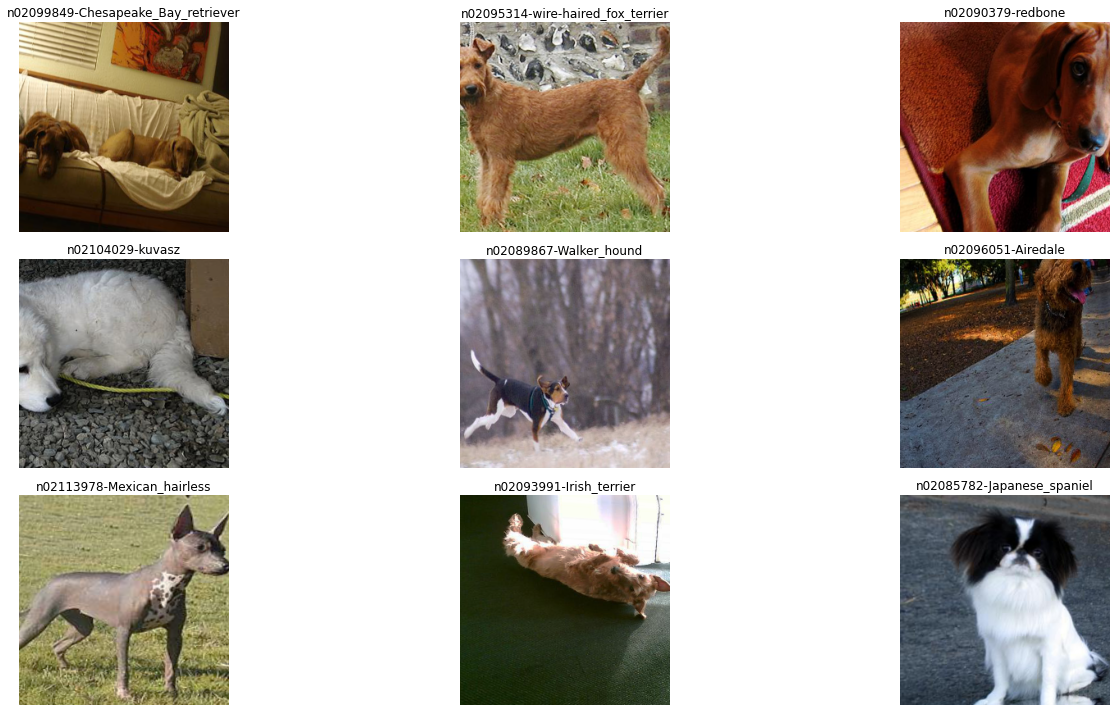

In [ ]:
# Show some of the batch to prove its working
data.show_batch(rows=3, figsize = (20,10))

In [ ]:
# Get the training ready
from fastai.train import ShowGraph
from fastai.vision.learner import cnn_learner
learn = cnn_learner(data, models.resnet34, metrics=[accuracy, error_rate], callback_fns = ShowGraph, model_dir="/tmp/model")

In [ ]:
# Show the learning model
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.362379,0.663706,0.796890,0.203110,05:00
1,0.874923,0.503530,0.842080,0.157920,05:10
2,0.658986,0.448726,0.856657,0.143343,05:14
3,0.528650,0.419222,0.873178,0.126822,05:03


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f6f0a985440>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f6f0a985440>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

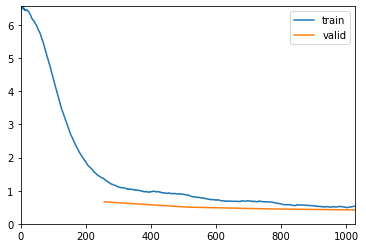

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f6f0a985440>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f6f0a985440>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

In [ ]:
# Train the Model
learn.fit_one_cycle(4)

In [ ]:
# Export the model
learn.export(os.path.abspath('exports/export.pkl'))

In [ ]:
# Convert to a pytorch model
import torch
import torchvision
import torchvision.transforms as transforms

# load FastAI ResNet model
learn = load_learner('exports')

# get PyTorch model
# .model attribute stores the model
# .eval() sets the model into evaluation mode - no backward propagation
pytorch_model = learn.model.eval()

# define softmax layer
softmax_layer = torch.nn.Softmax(dim=1) # define softmax

# define normalization layer
normalization_layer = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

# assemble the final model
final_model = nn.Sequential(
    normalization_layer,
    pytorch_model,
    softmax_layer
)

In [ ]:
# export to an ONNX file ready
import torch

torch.onnx.export(
    final_model, 
    torch.randn(1, 3, size, size, device="cuda"),
    'models/dog_model_resnet18_256_256.onnx',
    do_constant_folding=True,
    export_params=True,
    input_names=['image_1_3_256_256'],
    output_names=['dog'], opset_version = 11
)

In [ ]:
# Code for downloading the dog images
from google.colab import files
import os

# Just needed in case you'd like to append it to an array

#for file in os.listdir("/content/images/Images"):
#  filepath = "/content/images/Images/" + file
#  zipfilepath = "/content/Zips/" + file + ".zip"
#  !zip -r {zipfilepath} {filepath}
#  files.download("/content/Zips/" + file + ".zip")

In [ ]:
# Displaying the differ dog images and their position in the file structure
# (This was for testing if the ONNX weight corresponded to these values)
from google.colab import files
import os

# Just needed in case you'd like to append it to an array

currentcount = 0;
for file in os.listdir("/content/images/Images"):
  print(file +": " + str(currentcount))
  currentcount += 1


n02089973-English_foxhound: 0
n02097474-Tibetan_terrier: 1
n02096294-Australian_terrier: 2
n02099429-curly-coated_retriever: 3
n02111500-Great_Pyrenees: 4
n02113712-miniature_poodle: 5
n02110185-Siberian_husky: 6
n02096437-Dandie_Dinmont: 7
n02093754-Border_terrier: 8
n02087046-toy_terrier: 9
n02105641-Old_English_sheepdog: 10
n02113023-Pembroke: 11
n02113186-Cardigan: 12
n02112018-Pomeranian: 13
n02098286-West_Highland_white_terrier: 14
n02108915-French_bulldog: 15
n02093991-Irish_terrier: 16
n02107312-miniature_pinscher: 17
n02105505-komondor: 18
n02093859-Kerry_blue_terrier: 19
n02097209-standard_schnauzer: 20
n02094258-Norwich_terrier: 21
n02111129-Leonberg: 22
n02102973-Irish_water_spaniel: 23
n02085782-Japanese_spaniel: 24
n02108089-boxer: 25
n02113978-Mexican_hairless: 26
n02089078-black-and-tan_coonhound: 27
n02104029-kuvasz: 28
n02113624-toy_poodle: 29
n02097047-miniature_schnauzer: 30
n02107142-Doberman: 31
n02088364-beagle: 32
n02091831-Saluki: 33
n02115913-dhole: 34
n021005